# Data parsing issue

Kostas detected a date parsing issue in the public dataset:  
" I think a script somewhere tried to read as m/d/y and and when month > 13, it probably had an exception and flipped to d/m/y mode
However, if one flips m with d for month < 12 it is fixed I think"

## Clear illustration of the issue

In [ ]:
import pandas as pd 

In [ ]:
test = pd.to_datetime('5/10/2020')
display(test)
test.day

So when the date is 5/10 the second number is taken as the day (US convention)

In [ ]:
test = pd.to_datetime('13/5/2020')
display(test)
test.day

When the date is 13/5 the first number is taken as the day (EU convention)

In [ ]:
test = pd.to_datetime(['5/10/2020', '13/5/2020'])
test.day

Parsing both dates jointly parses one using the EU convention and the other using US convention  
As such you have to specify the format explicitly! 

In [ ]:
test = pd.to_datetime(['5/10/2020', '13/5/2020'], format = '%d/%m/%Y')
test.day

## So basically in any place where we use pandas.to_datetime and the dates are in Day/month/year format we'll have this issue!  
## I think this issue is in all our preprocessing code

# preprocess EANDIS2017: correct

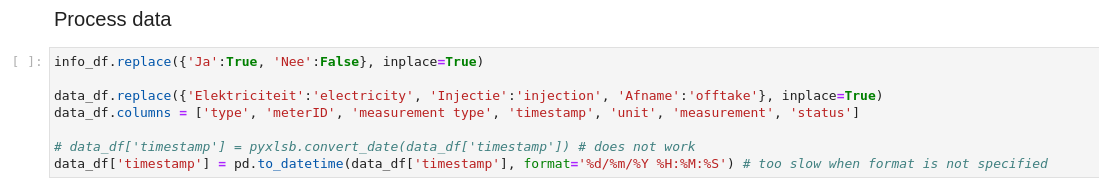


# preprocess EANDIS AMR: correct

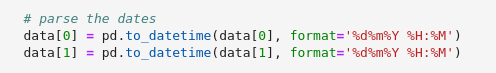

# Preprocess infrax data: mostly correct

The timestamps are most often in another format (something binary) so these are parsed directly and correctly.  
For two smaller subsets there might be an issue which I'll investigate and solve :) 
